### IRIS flower

A machine learning system to predict the iris flower type based on the K nearest neighbors algorithm. 

<p><b>The independent variables are</b></p>

- sepallength
- sepalwidth
- petallength
- petalwidth

<p><b>The dependent variable is </b></p>

- The iris flower type

<p><b>Dataset</b></p>

- The dataset used for this experiment can be downloaded form this [link](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

<p><b>Tools</b><p>
    
To work with this project, multiple libraries and frameworks need to be installed. The following is a list of them.
- [Pandas](https://pandas.pydata.org/)
- [NumPy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Sciki-learn](https://scikit-learn.org/stable/)
    

#### Import the necessary packets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The dataset is unlabeled; an assigned label is needed

In [4]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# read the iris.data as csv and assign the label
df = pd.read_csv('iris.data', names = headernames)

df.head(3)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


#### Data preprocessing

Select the first four columns as independent (x) variables and the last column as dependent(y)

In [5]:
x = df.iloc[:, :-1].values
y = df.iloc[:,4].values

#### Normalize the data
> we only have numeric data so we don't used onehotencoder

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

#### Split the data into train and test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.40)

#### import the k-nn model 

Text(0, 0.5, 'Accuracy')

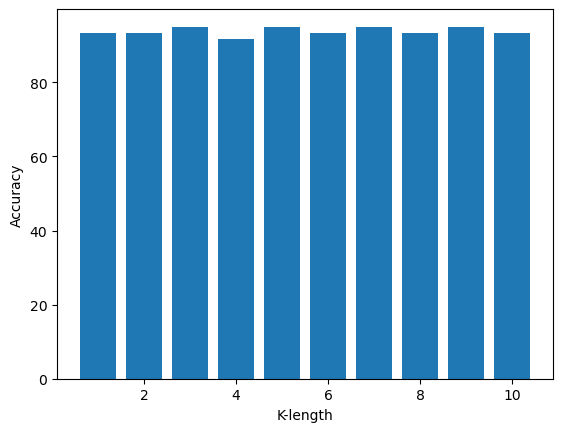

In [14]:
from sklearn.neighbors import KNeighborsClassifier
k = 10
accuracy_result = []
for i in range(1,k+1):

    model = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    yhat = model.predict(X_test)

    from sklearn import metrics
    # print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train))*100)
    ac = metrics.accuracy_score(y_test, yhat)
    # print("Test set Accuracy: ",ac )
    
    accuracy_result.append(ac)

plt.bar(np.arange(1,k+1), [i*100 for i in accuracy_result])
plt.xlabel('K-length')
plt.ylabel('Accuracy')

In [16]:
print('The best accuracy achieved where k is equal to ', str(accuracy_result.index(max(accuracy_result))), "The accuracy is ",str(accuracy_result[accuracy_result.index(max(accuracy_result))]*100)+"%")

The best accuracy achieved where k is equal to  2 The accuracy is  95.0%


#### Deploying

In [17]:
import joblib
import os
if not os.path.exists('Model'):
        os.mkdir('Model')
if not os.path.exists('Scaler'):
        os.mkdir('Scaler')
        
joblib.dump(model, r'Model/model.pickle')
joblib.dump(scaler, r'Scaler/scaler.pickle')

['Scaler/scaler.pickle']

To use the proposed model with real data create another file deploy.py and this lines


In [19]:
import pandas as pd

# 1- define the new data
new_data = pd.DataFrame([{'sepal-length':5.3, 'sepal-width':3.7, 'petal-length':1.6, 'petal-width':0.22}])
new_data = new_data[['sepal-length','sepal-width','petal-length','petal-width']]

# 2- import the Scalar and KNN models 

import joblib

model = joblib.load(r'Model/model.pickle')
scaler = joblib.load(r'Scaler/scaler.pickle')

# 3- Normalize the data
new_data = scaler.transform(new_data)
predict_calass = model.predict(new_data)

print(predict_calass)

['Iris-setosa']


C:\Users\ali\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
